In [40]:
%matplotlib inline
import pandas
import os
import collections

path = "data/train_set/"

def find_files(path, substring):
    files = os.listdir(path)
    return sorted(path + f for f in files if substring in f)

def parse_date(c):
    return pandas.to_datetime(c.astype(int), unit="ms")

def load_files(files, resample_interval=None, date_cols=["ut_ms"]):
    data = [pandas.read_csv(f,parse_dates=date_cols, date_parser=parse_date, index_col=0) for f in files]
    if resample_interval:
        data = [d.resample(resample_interval).mean().interpolate() for d in data]
    return pandas.concat(data)

In [2]:
import numpy
data = [(1, 2), (3, 4), (5, 6)]
numpy.asarray(data)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [41]:
power_data = load_files(find_files(path, "power"), resample_interval="1H")
power_data.describe()

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
count,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,...,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000
mean,0.127154,0.002083,0.175338,0.712616,0.000739,0.001244,0.002384,0.002431,0.201138,0.005294,...,0.000992,0.001536,0.134204,0.005781,0.298586,0.000528,0.000522,0.000745,0.043830,0.003374
std,0.040008,0.009370,0.001154,0.315908,0.000014,0.000582,0.022035,0.009196,0.053472,0.012205,...,0.000387,0.000030,0.078738,0.000108,0.172252,0.000078,0.000011,0.000014,0.143450,0.000067
min,0.001457,0.001411,0.034283,0.004949,0.000571,0.000613,0.000499,0.001462,0.001962,0.004884,...,0.000545,0.001179,0.002123,0.004438,0.004733,0.000494,0.000479,0.000703,0.006134,0.003156
25%,0.097210,0.001510,0.175089,0.454761,0.000731,0.000651,0.000566,0.001876,0.168678,0.005153,...,0.000581,0.001519,0.070790,0.005724,0.157124,0.000521,0.000516,0.000738,0.006676,0.003342
50%,0.121331,0.001529,0.175371,0.637399,0.000740,0.001142,0.000573,0.001899,0.198975,0.005215,...,0.000996,0.001539,0.133567,0.005793,0.304358,0.000528,0.000523,0.000747,0.006765,0.003383
75%,0.154242,0.001545,0.175606,0.972590,0.000747,0.001777,0.000578,0.001918,0.229161,0.005268,...,0.001319,0.001555,0.186210,0.005852,0.395997,0.000534,0.000528,0.000754,0.006837,0.003416
max,0.376517,0.267175,0.177803,2.175650,0.000857,0.006247,0.402500,0.306428,0.435523,1.965179,...,0.006263,0.001769,0.324555,0.006287,1.146090,0.010409,0.000598,0.000857,0.723399,0.003873


In [15]:
longterm_data = load_files(find_files(path, "ltdata"))
longterm_data.describe()

,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min
count,2.061000e+03,2.061000e+03,2061.000000,2061.000000,2061.000000,2061.000000
mean,2.289354e+08,2.715726e+08,22.552500,590.958510,16.454731,18.068260
std,1.502282e+07,8.800971e+07,11.954585,78.516293,18.362685,20.537767
min,2.066449e+08,9.242161e+07,0.280288,492.116468,0.000000,0.000000
25%,2.139517e+08,2.012069e+08,12.117072,513.963102,0.000000,0.000000
50%,2.298804e+08,3.014157e+08,23.891058,578.492159,5.183333,11.100000
75%,2.438848e+08,3.493427e+08,33.886943,667.836542,34.516667,33.550000
max,2.492395e+08,3.744911e+08,39.859552,715.899348,55.450000,87.733333


In [47]:
event_data = load_files(find_files("data/v2/all_data/", "evtf"))
event_data.description.value_counts()


4000_KM_DESCEND                                                                 9464
4000_KM_ASCEND                                                                  9464
800_KM_ASCEND                                                                   9464
2000_KM_DESCEND                                                                 9464
800_KM_DESCEND                                                                  9464
1200_KM_DESCEND                                                                 9464
2000_KM_ASCEND                                                                  9464
1200_KM_ASCEND                                                                  9464
MRB_/_RANGE_06000KM_START                                                       8825
MRB_/_RANGE_06000KM_END                                                         8825
MRB_AOS_00                                                                      6505
MRB_LOS_00                                                       

In [49]:
event_data[event_data.description.str.contains("_KM_")].description

ut_ms
2008-08-22 01:30:40    4000_KM_DESCEND
2008-08-22 01:52:36    2000_KM_DESCEND
2008-08-22 02:01:40    1200_KM_DESCEND
2008-08-22 02:06:59     800_KM_DESCEND
2008-08-22 02:32:10      800_KM_ASCEND
2008-08-22 02:37:34     1200_KM_ASCEND
2008-08-22 02:46:45     2000_KM_ASCEND
2008-08-22 03:08:53     4000_KM_ASCEND
2008-08-22 08:21:27    4000_KM_DESCEND
2008-08-22 08:43:23    2000_KM_DESCEND
2008-08-22 08:52:27    1200_KM_DESCEND
2008-08-22 08:57:45     800_KM_DESCEND
2008-08-22 09:22:58      800_KM_ASCEND
2008-08-22 09:28:21     1200_KM_ASCEND
2008-08-22 09:37:33     2000_KM_ASCEND
2008-08-22 09:59:40     4000_KM_ASCEND
2008-08-22 15:12:08    4000_KM_DESCEND
2008-08-22 15:34:04    2000_KM_DESCEND
2008-08-22 15:43:07    1200_KM_DESCEND
2008-08-22 15:48:26     800_KM_DESCEND
2008-08-22 16:13:38      800_KM_ASCEND
2008-08-22 16:19:01     1200_KM_ASCEND
2008-08-22 16:28:12     2000_KM_ASCEND
2008-08-22 16:50:20     4000_KM_ASCEND
2008-08-22 22:02:47    4000_KM_DESCEND
2008-08-22 22:24:43

In [7]:
def get_event_ranges(event_data, event_prefix):
    current_start = None
    event_ranges = []
    for date, row in event_data[event_data.description.str.startswith(event_prefix)].iterrows():
        if row["description"].endswith("_START"):
            current_start = date
        elif current_start:
            event_ranges.append({"duration": date - current_start, 
                                 "start": current_start,
                                 "end": date})
            current_start = None
    return event_ranges

In [13]:
pandas.DataFrame(get_event_ranges(event_data, "DEI_PENUMBRA")).describe()

,duration,end,start
count,25,25,25
unique,NaN,25,25
top,NaN,2013-08-29 11:17:30,2010-12-24 13:40:22
freq,NaN,1,1
first,NaN,2008-09-18 10:33:57,2008-09-18 10:32:23
last,NaN,2015-04-13 11:03:50,2015-04-13 11:03:20
mean,0 days 00:02:05.720000,NaN,NaN
std,0 days 00:01:14.180815,NaN,NaN
min,0 days 00:00:30,NaN,NaN
25%,0 days 00:01:14,NaN,NaN


In [9]:
pandas.DataFrame(get_event_ranges(event_data, "MAR_PENUMBRA")).describe()

,duration,end,start
count,5025,5025,5025
unique,NaN,5025,5025
top,NaN,2010-10-01 13:40:15,2010-10-25 10:38:22
freq,NaN,1,1
first,NaN,2008-08-22 02:12:32,2008-08-22 02:08:22
last,NaN,2016-02-29 23:08:08,2016-02-29 22:48:59
mean,0 days 00:31:04.897512,NaN,NaN
std,0 days 00:11:16.107916,NaN,NaN
min,0 days 00:00:30,NaN,NaN
25%,0 days 00:23:33,NaN,NaN


In [8]:
def fill_events(prefix):
    col = "IN_" + prefix
    power_data[col] = 0
    
    for event in get_event_ranges(event_data, prefix):
        closest_start = power_data.index.searchsorted(event["start"])
        closest_end = power_data.index.searchsorted(event["end"])
        power_data.loc[closest_start:closest_end, col] = 1

fill_events("MAR_UMBRA")
power_data.describe()

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882,IN_MAR_UMBRA
count,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,...,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000,49464.000000
mean,0.127154,0.002083,0.175338,0.712616,0.000739,0.001244,0.002384,0.002431,0.201138,0.005294,...,0.001536,0.134204,0.005781,0.298586,0.000528,0.000522,0.000745,0.043830,0.003374,0.036875
std,0.040008,0.009370,0.001154,0.315908,0.000014,0.000582,0.022035,0.009196,0.053472,0.012205,...,0.000030,0.078738,0.000108,0.172252,0.000078,0.000011,0.000014,0.143450,0.000067,0.188458
min,0.001457,0.001411,0.034283,0.004949,0.000571,0.000613,0.000499,0.001462,0.001962,0.004884,...,0.001179,0.002123,0.004438,0.004733,0.000494,0.000479,0.000703,0.006134,0.003156,0.000000
25%,0.097210,0.001510,0.175089,0.454761,0.000731,0.000651,0.000566,0.001876,0.168678,0.005153,...,0.001519,0.070790,0.005724,0.157124,0.000521,0.000516,0.000738,0.006676,0.003342,0.000000
50%,0.121331,0.001529,0.175371,0.637399,0.000740,0.001142,0.000573,0.001899,0.198975,0.005215,...,0.001539,0.133567,0.005793,0.304358,0.000528,0.000523,0.000747,0.006765,0.003383,0.000000
75%,0.154242,0.001545,0.175606,0.972590,0.000747,0.001777,0.000578,0.001918,0.229161,0.005268,...,0.001555,0.186210,0.005852,0.395997,0.000534,0.000528,0.000754,0.006837,0.003416,0.000000
max,0.376517,0.267175,0.177803,2.175650,0.000857,0.006247,0.402500,0.306428,0.435523,1.965179,...,0.001769,0.324555,0.006287,1.146090,0.010409,0.000598,0.000857,0.723399,0.003873,1.000000


In [43]:
col_counts = collections.Counter({col: power_data[col].mean() for col in power_data.columns}).most_common()
col_var = collections.Counter({col: power_data[col].std() for col in power_data.columns}).most_common()

In [10]:
downsampled = power_data.resample("1D").mean()
reup = downsampled.reindex(power_data.index, method="pad")

# compute MSE
((power_data - reup) ** 2).mean(axis=0).mean() ** 0.5

0.091776050421821381

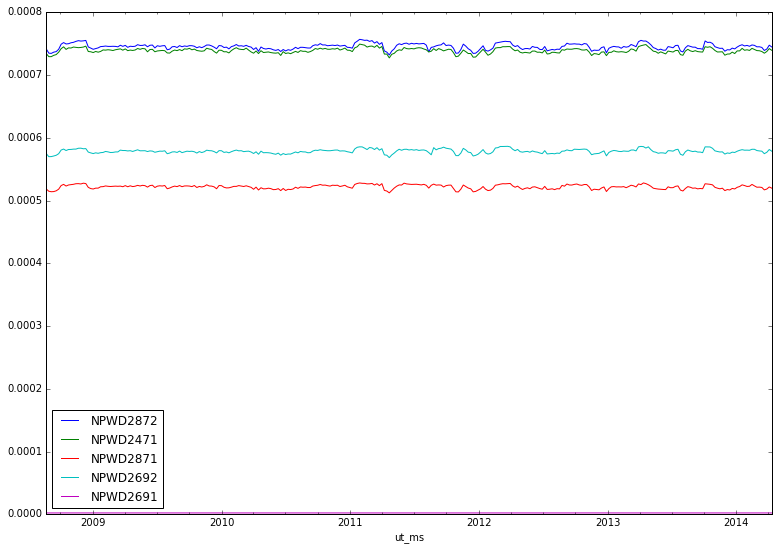

In [53]:
# for individual columns
power_data[[col for col, _ in col_var[-5:]]].resample("7D").mean().plot(figsize=(13, 9))

# sum totals
# power_data.sum(axis=1).resample("1D").mean().plot(figsize=(10, 7))
# longterm_data[["eclipseduration_min", "occultationduration_min"]].plot(figsize=(13, 9))

# power_data.sum(axis=1).resample("7D").mean().plot()

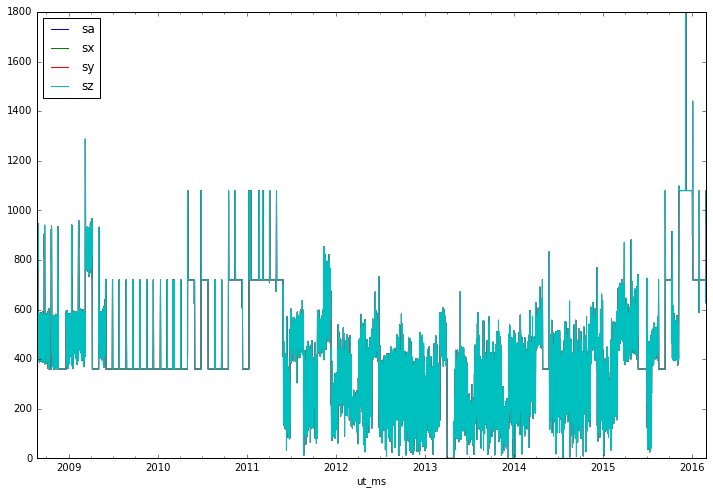

In [57]:
saa_data = load_files(find_files("data/all_data/", "saaf"))
saa_data.describe()

saa_data.resample("6H").count().plot(figsize=(12, 8))

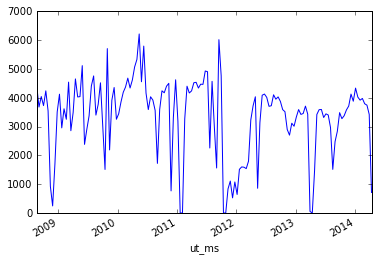

In [39]:
dmop_data = load_files(find_files(path, "dmop"))
# dmop_data = dmop_data[:1000]
# dmop_data["subsystem"] = dmop_data.subsystem.str.replace(r"\..+", "")
dmop_data["dummy"] = 1
dmop_data.dummy.resample("14D").count().plot()
# dmop_data = dmop_data.pivot_table(index=dmop_data.index, columns="subsystem", values="dummy").resample("1D").count()

# column_variance = collections.Counter({col: dmop_data[col].std() for col in dmop_data.columns})
# print column_variance.most_common()
# for col, _ in column_variance.most_common()[:5]:
#     dmop_data[col].plot()

In [58]:
ftl_data = load_files(find_files(path, "ftl"), date_cols=["utb_ms", "ute_ms"])
ftl_data.head(100)

,ute_ms,type,flagcomms
utb_ms,,,
2008-08-22 00:00:13,2008-08-22 00:38:14,EARTH,False
2008-08-22 00:38:14,2008-08-22 01:45:55,EARTH,True
2008-08-22 01:45:55,2008-08-22 01:46:59,EARTH,False
2008-08-22 01:46:59,2008-08-22 01:57:33,SLEW,False
2008-08-22 01:57:33,2008-08-22 02:44:53,NADIR,False
2008-08-22 02:44:53,2008-08-22 03:09:23,SLEW,False
2008-08-22 03:09:23,2008-08-22 03:43:53,EARTH,False
2008-08-22 03:43:53,2008-08-22 04:59:04,EARTH,True
2008-08-22 04:59:04,2008-08-22 06:30:04,EARTH,False


In [59]:
ftl_data.type.value_counts()

SLEW             21786
EARTH            17459
INERTIAL          5547
D4PNPO            2520
MAINTENANCE       1999
NADIR             1969
WARMUP            1176
ACROSS_TRACK       894
RADIO_SCIENCE      690
D1PVMC             350
D9PSPO              49
SPECULAR            41
D2PLND              36
D3POCM              16
SPOT                15
D8PLTP               5
D7PLTS               4
D5PPHB               4
Name: type, dtype: int64